### Import Lib

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import seaborn as sns

In [2]:
df = pd.read_csv('../dataset/Raw.csv')

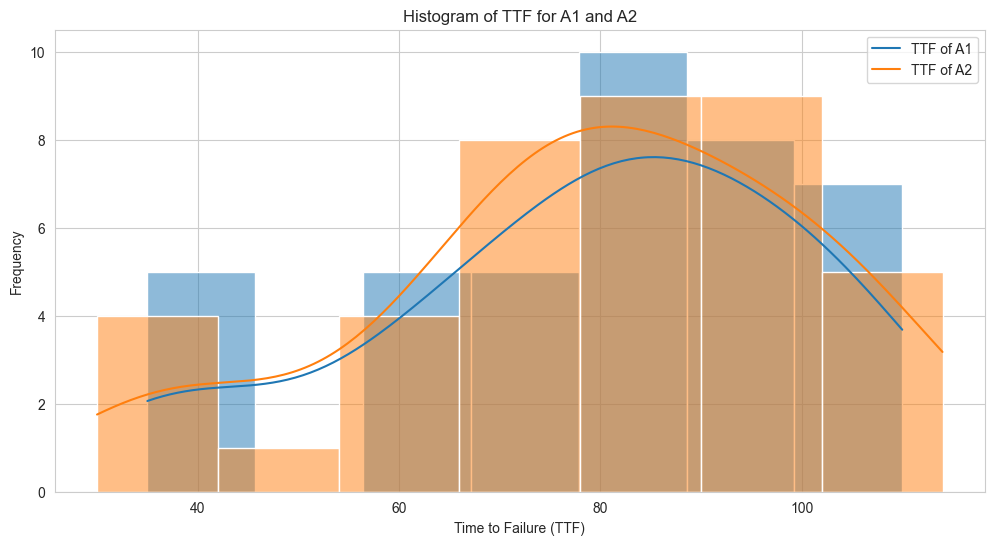

In [3]:
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.histplot(data=df, x="TTF of A1", kde=True)
sns.histplot(data=df, x="TTF of A2", kde=True)

plt.legend(["TTF of A1", "TTF of A2"])
plt.title("Histogram of TTF for A1 and A2")
plt.xlabel("Time to Failure (TTF)")
plt.ylabel("Frequency")
plt.show()

## Bootstrapping process

In [23]:
N_array = [15,20,30]
def random_sample(data, n,random_num):
    for i in range(random_num):
        samples = df.sample(n)
        samples.to_csv(f'bootstrapping_data/sample_{n}/sampled_data_{i+1}.csv', index=False)

In [ ]:
for N in N_array:
    random_sample(df, N, 30)

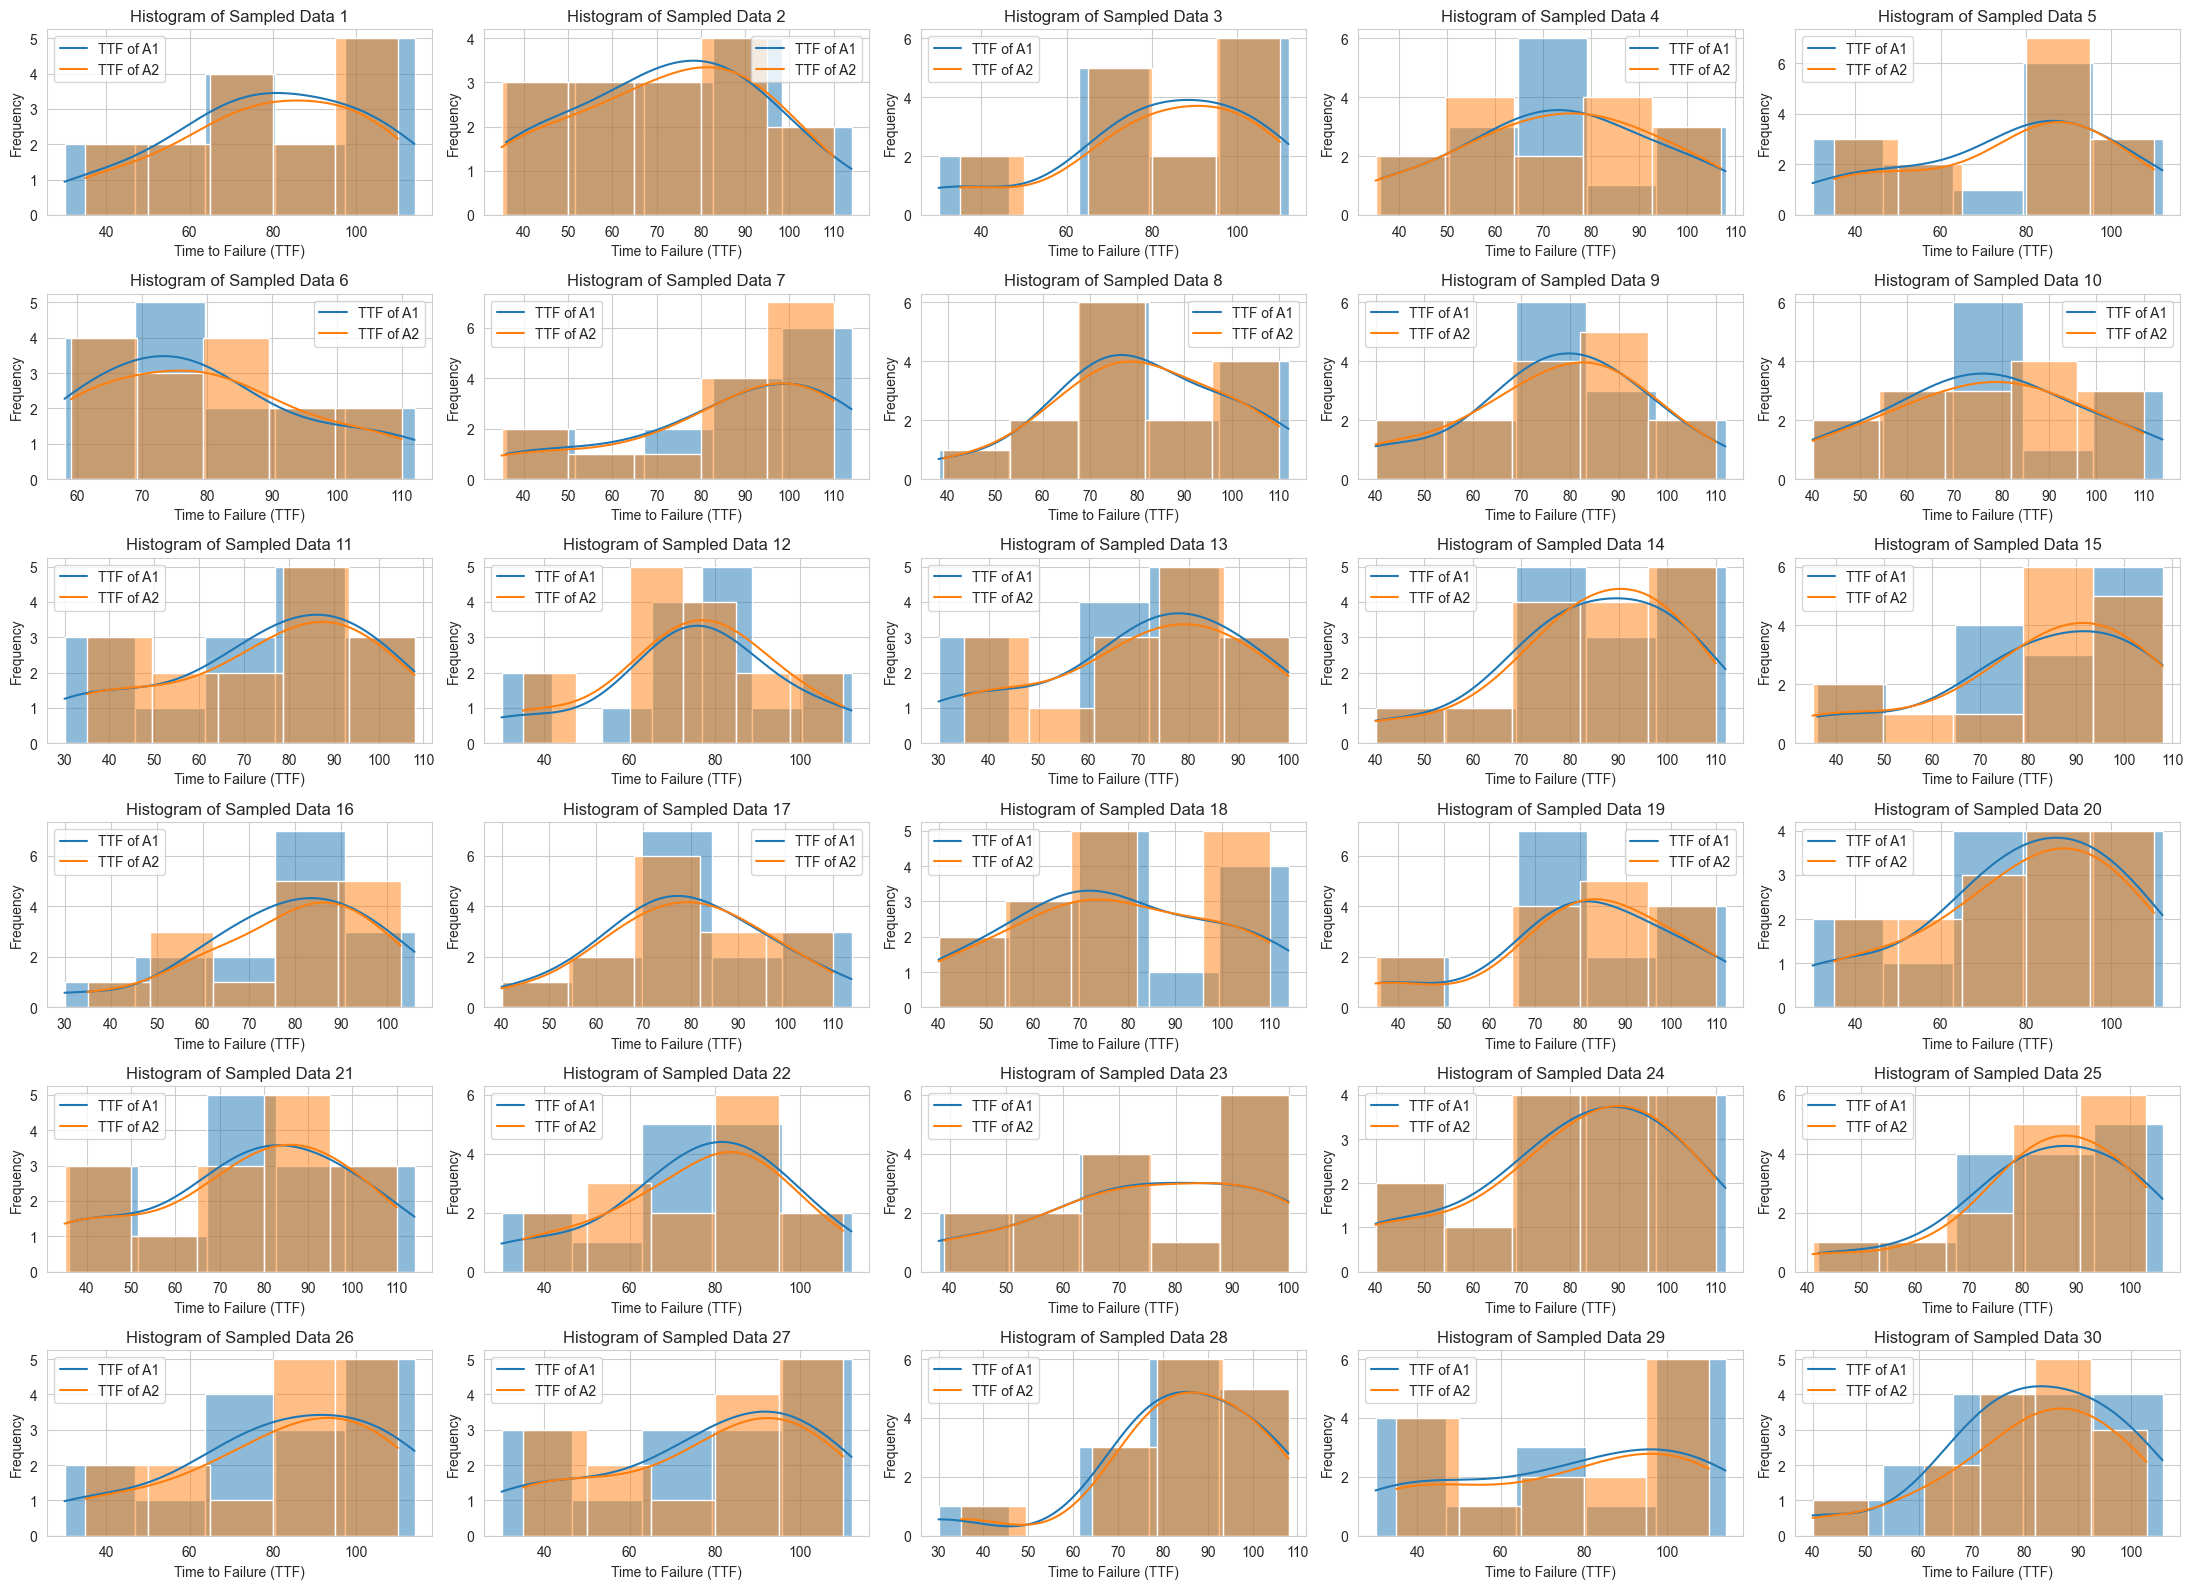

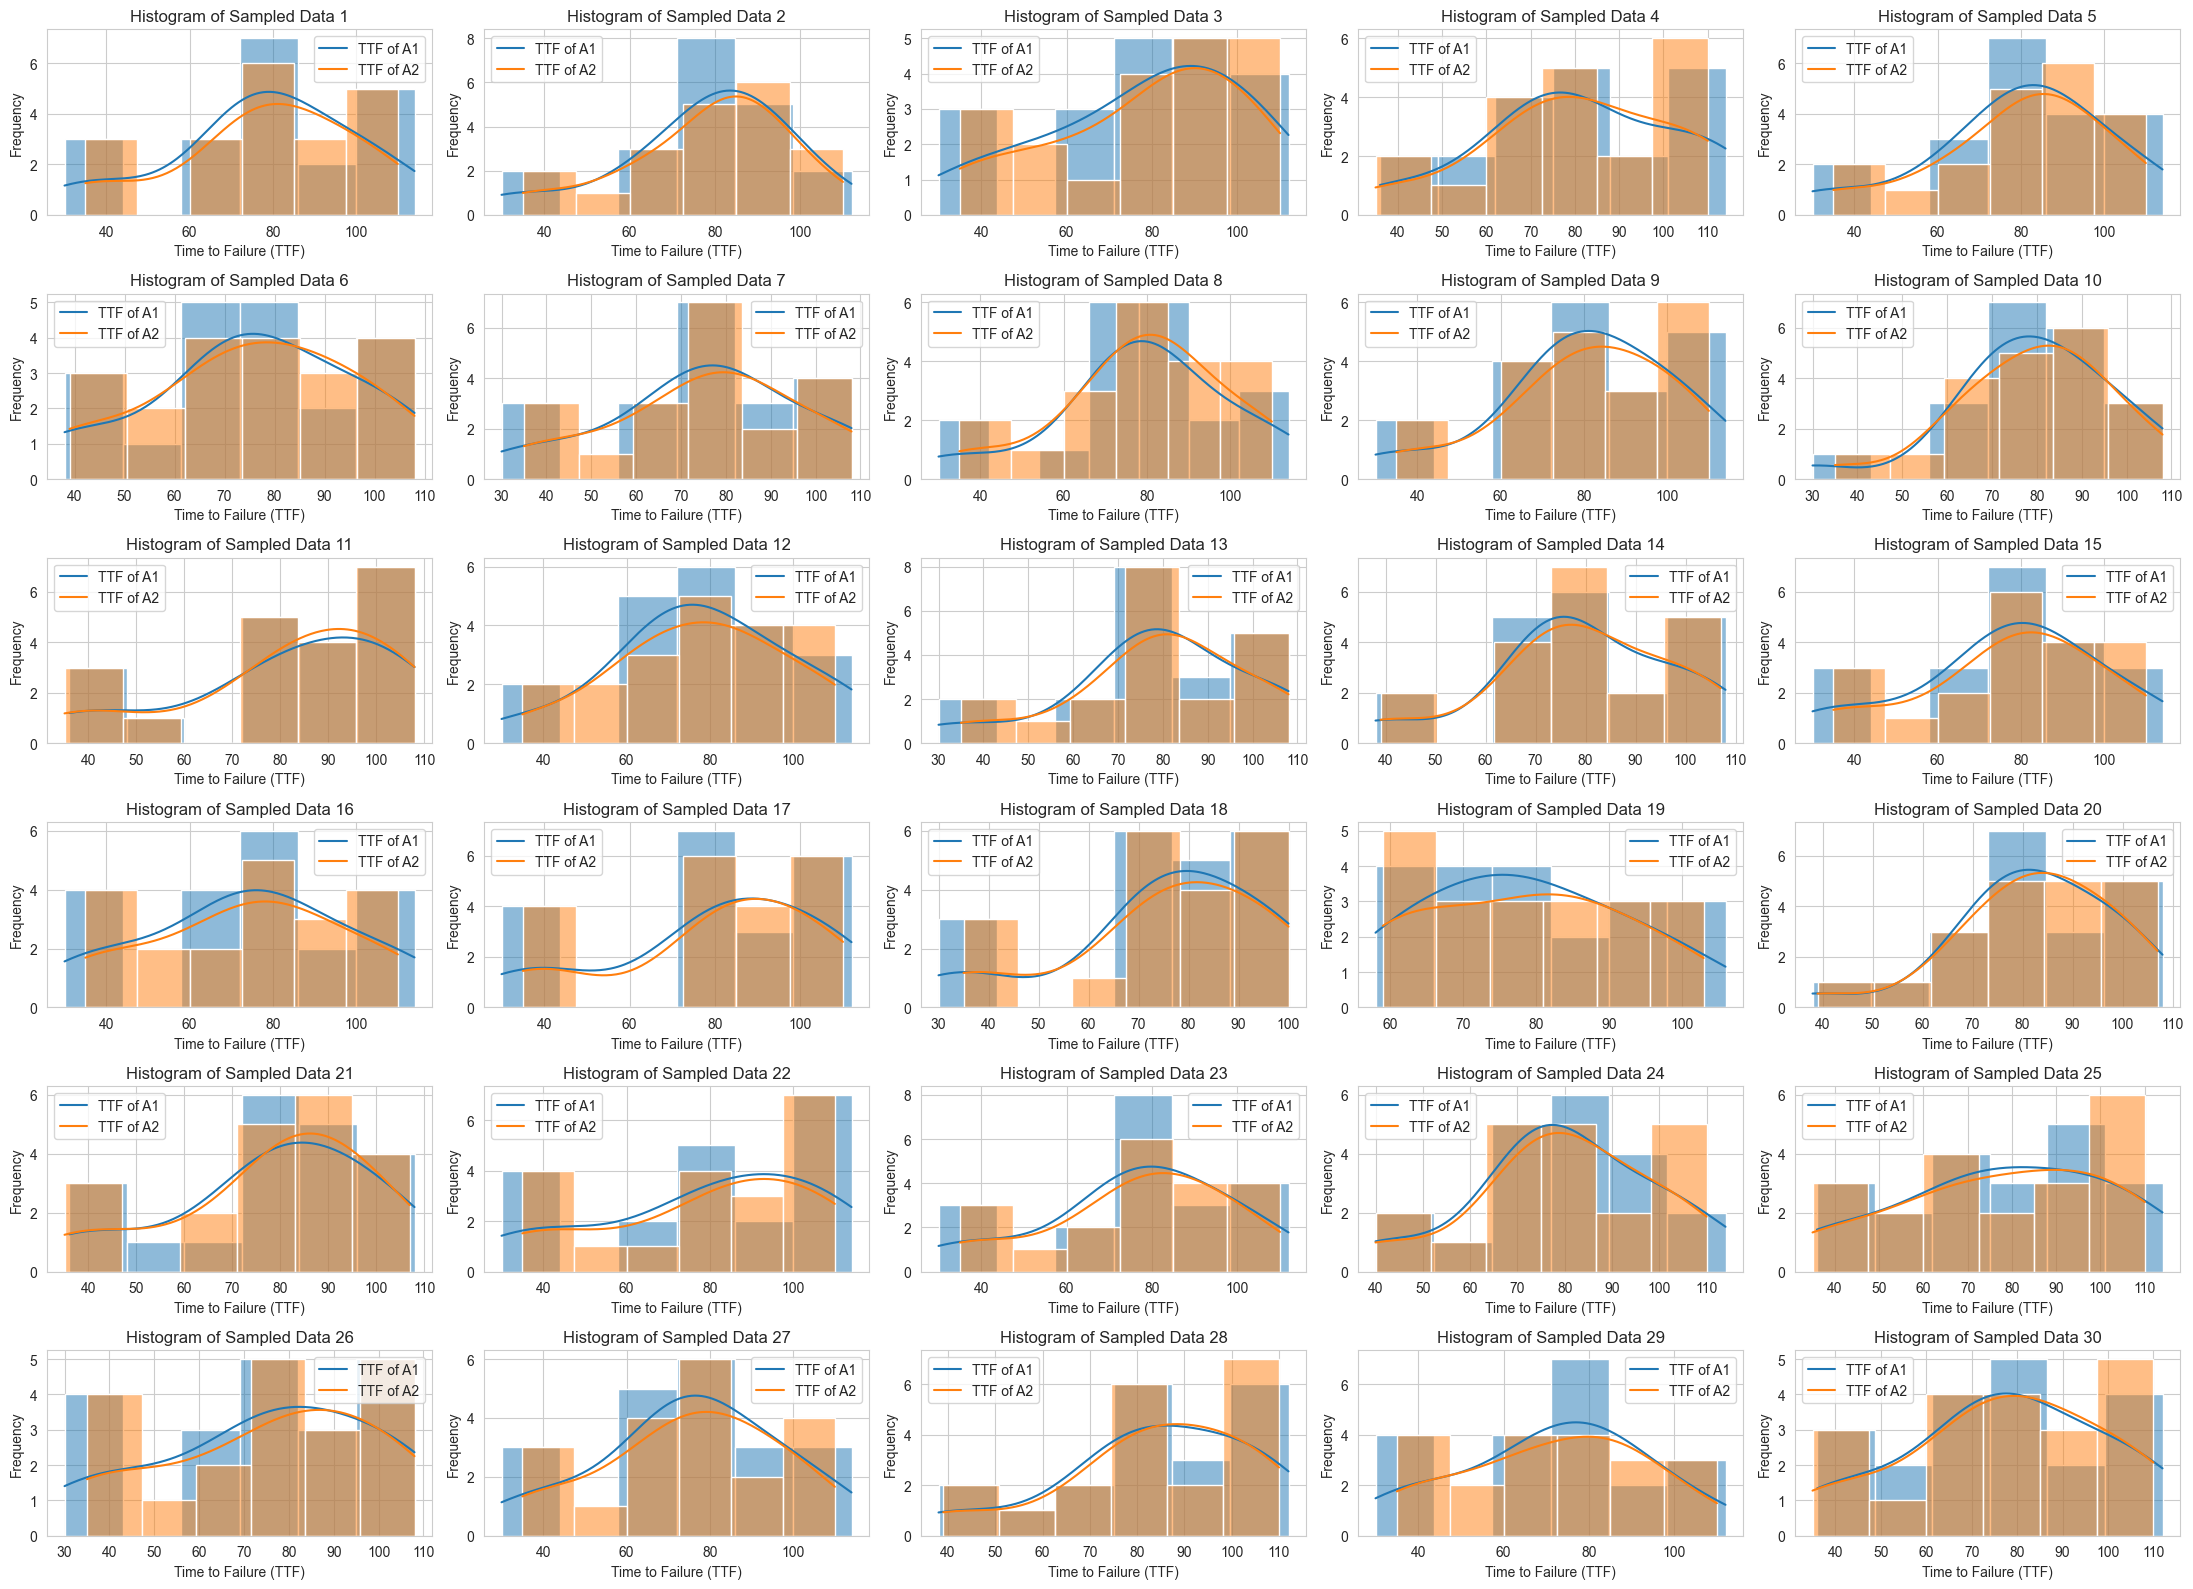

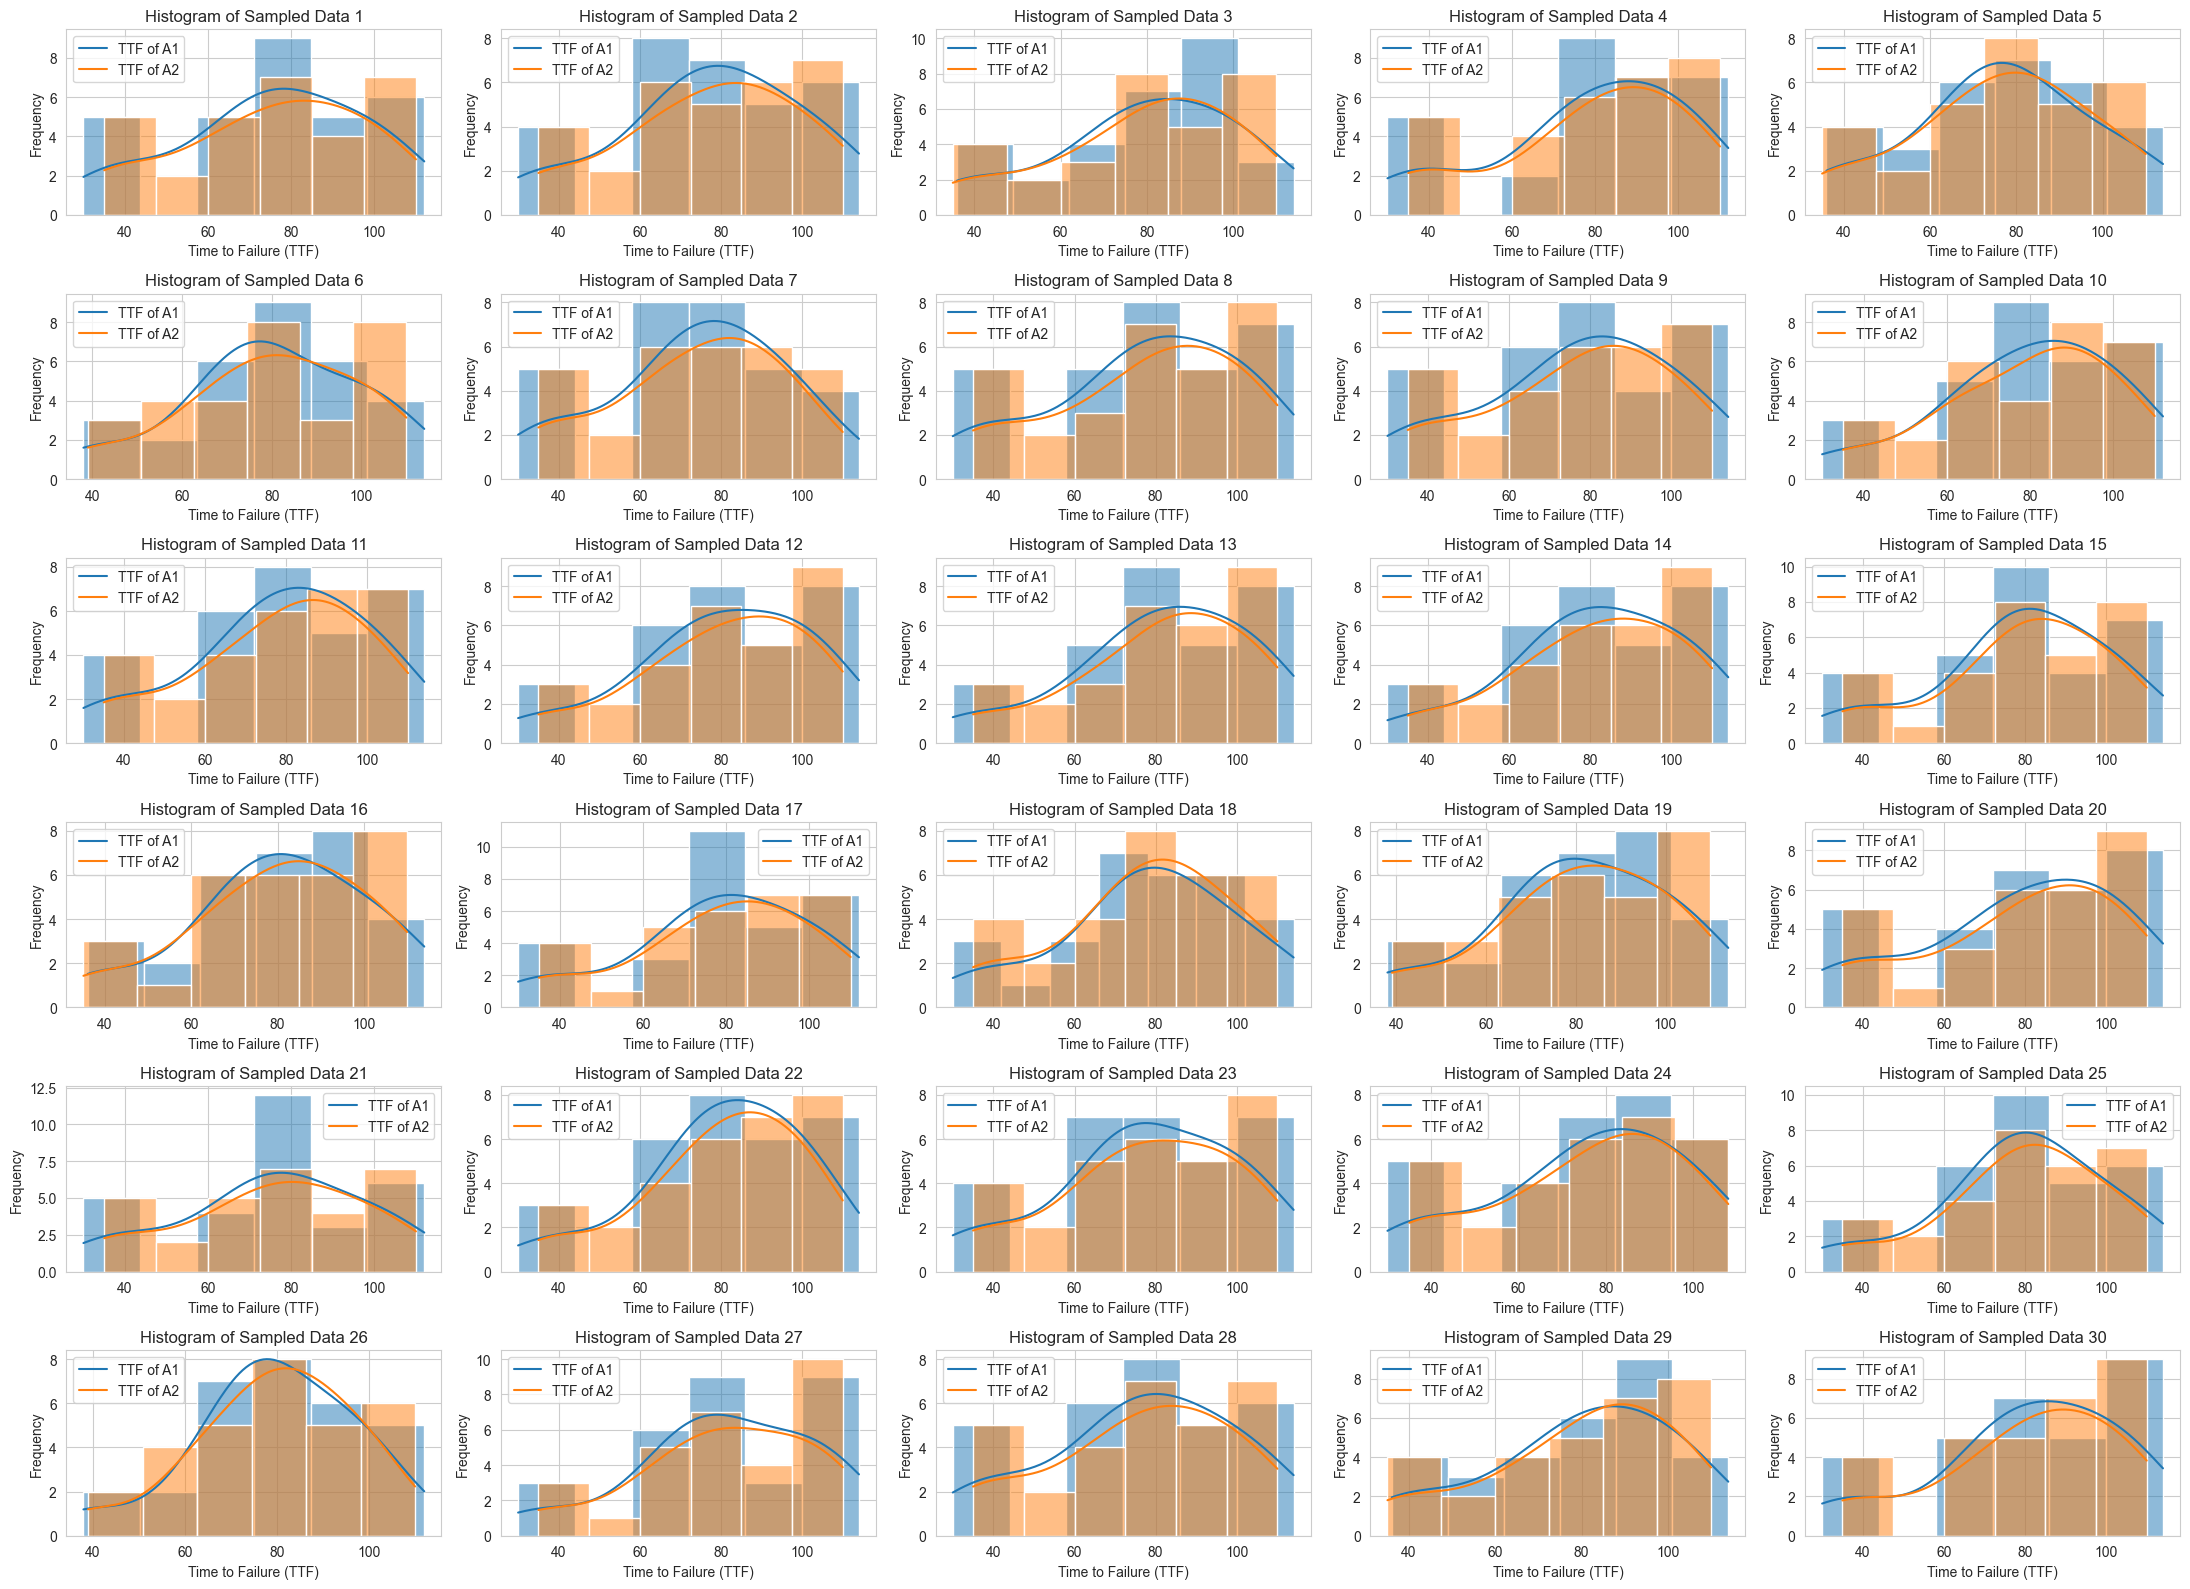

In [24]:
for N in N_array:
    plt.figure(figsize=(22, 16))
    sns.set_style("whitegrid")
    for i in range(1,31):
        df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
        plt.subplot(6, 5, i)
        plt.title(f'Histogram of Sampled Data {i}')
        sns.histplot(data=df_test, x="TTF of A1", kde=True)
        sns.histplot(data=df_test, x="TTF of A2", kde=True)
        plt.legend(["TTF of A1", "TTF of A2"])
        plt.xlabel("Time to Failure (TTF)")
        plt.ylabel("Frequency")
    plt.tight_layout()
    # plt.savefig(f'dataset/Fig/histogram_sample_{N}.png')
    plt.show()

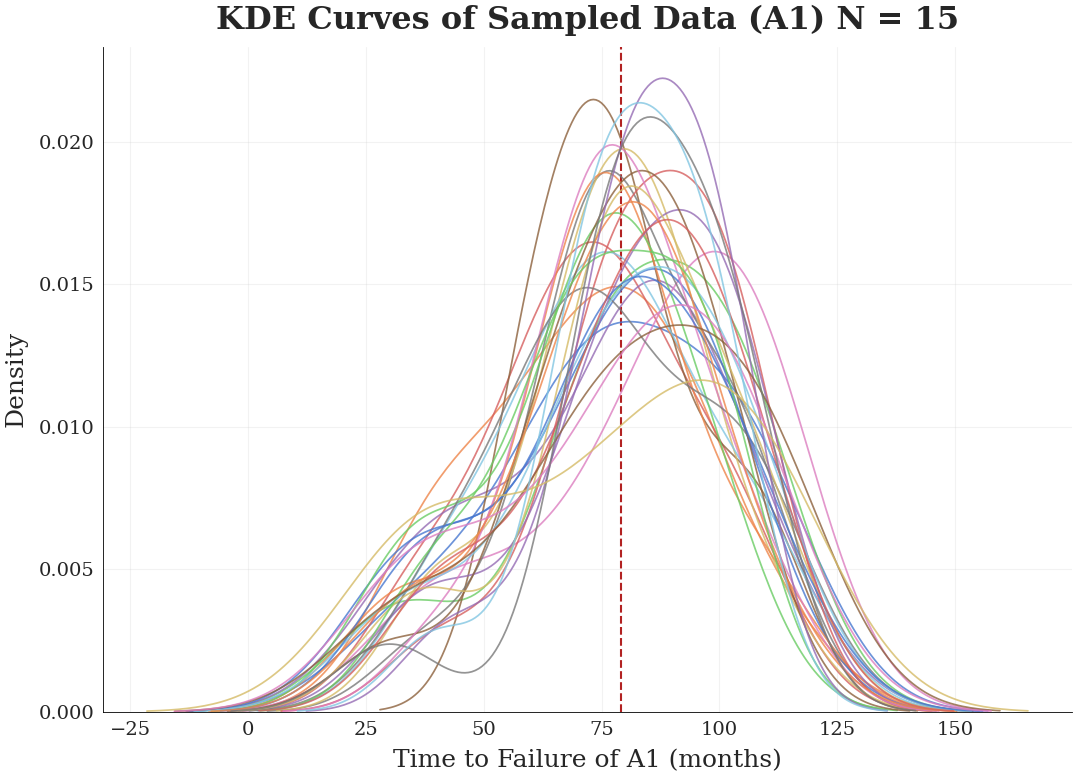

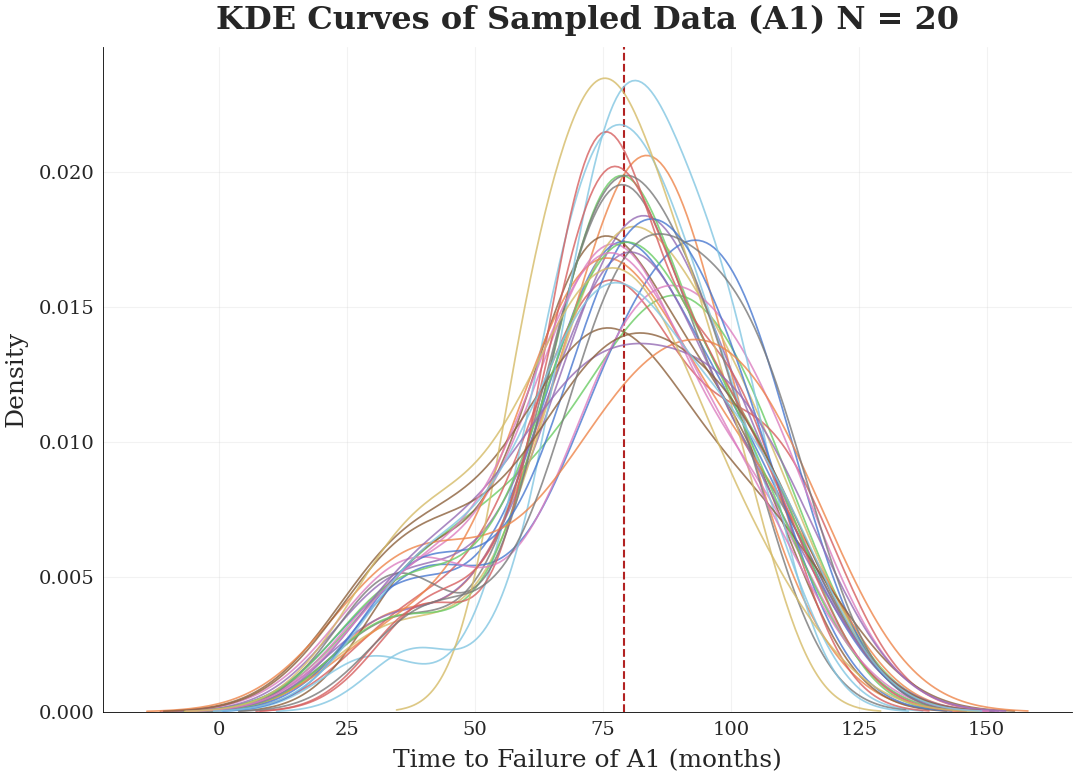

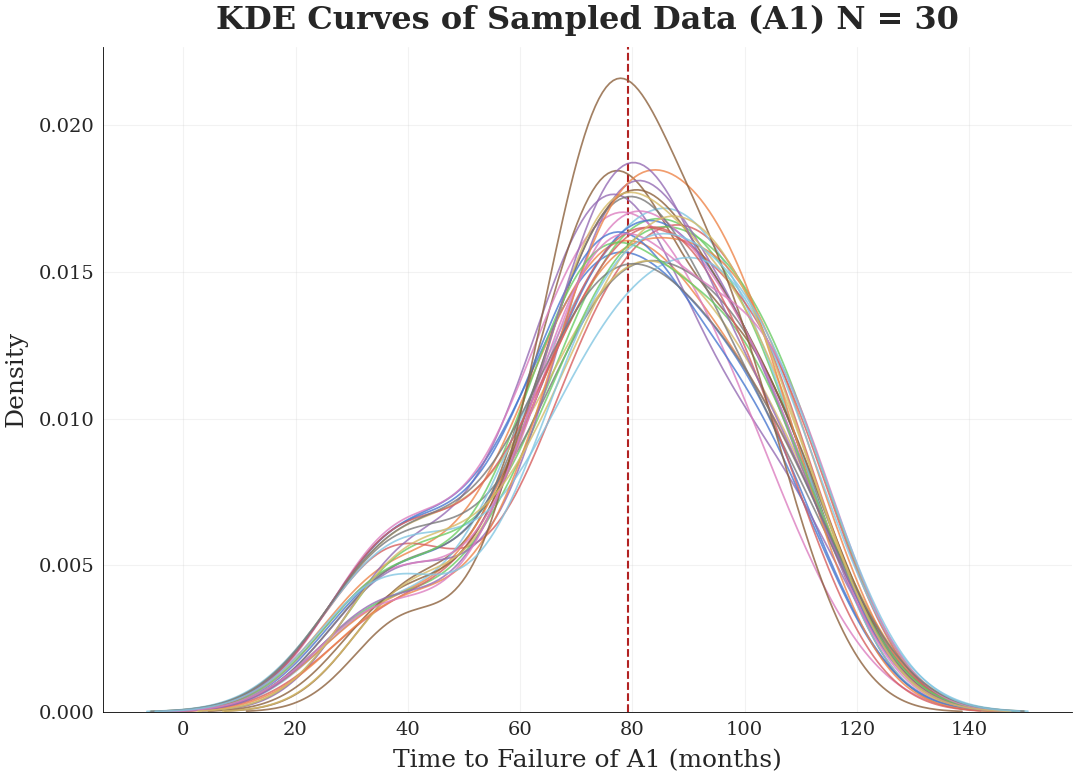

In [25]:
N_array = [15,20,30]
for N in N_array:
    plt.figure(figsize=(22, 16), dpi=50)
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")  
    plt.rcParams.update({
        'font.family': 'serif',
        'font.size': 22,
        'axes.titlesize': 40,
        'axes.labelsize': 32,
        'xtick.labelsize': 28,
        'ytick.labelsize': 28,
        'legend.fontsize': 24,
        'axes.edgecolor': 'black',
        'axes.linewidth': 1.2,
        'grid.alpha': 0.25,      
        'lines.linewidth': 3.0,
    })


    plt.axvline(x=6.6 * 12, linestyle="--", color='firebrick', linewidth=3, label="Threshold")
    palette = sns.color_palette("muted", 30)

    for i in range(1, 31):
        df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
        sns.kdeplot(data=df_test, x="TTF of A1", linewidth=2.5, color=palette[i-1], alpha=0.8)


    plt.title(f"KDE Curves of Sampled Data (A1) N = {N}", fontsize=46, fontweight='bold', pad=25)
    plt.xlabel("Time to Failure of A1 (months)", fontsize=36, labelpad=15)
    plt.ylabel("Density", fontsize=36, labelpad=15)
    sns.despine() 
    plt.tight_layout()
    # plt.savefig(f'dataset/Fig/kde_sample_A2_{N}.png')
    plt.show()

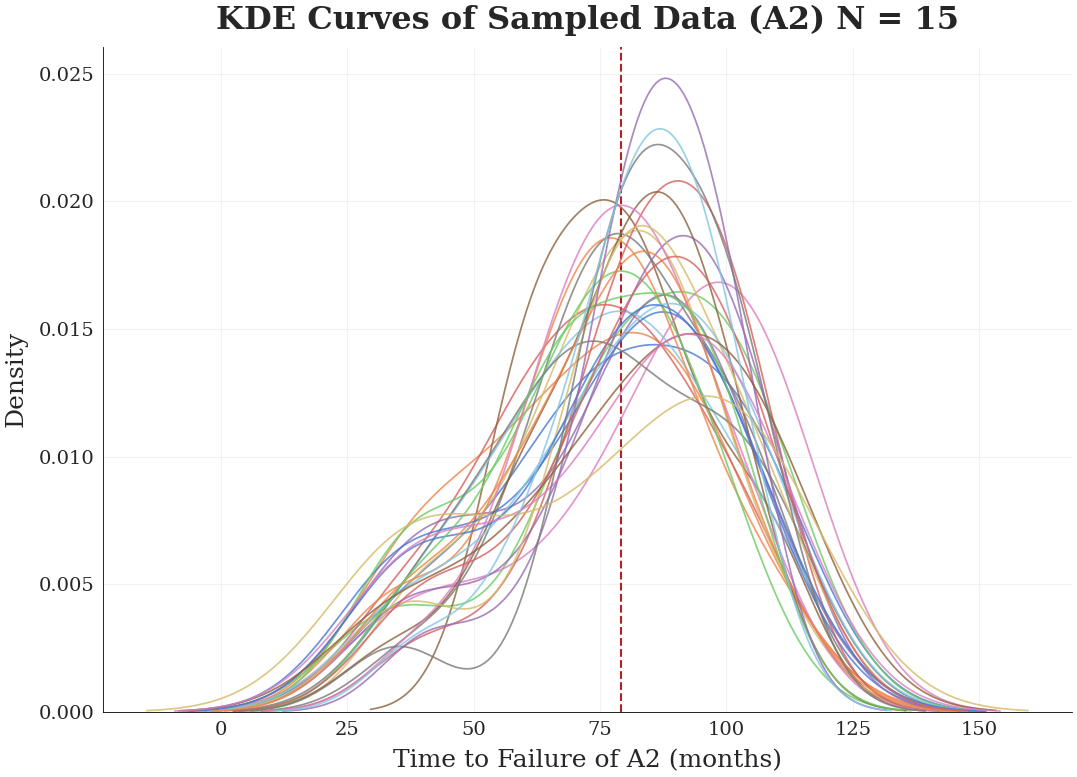

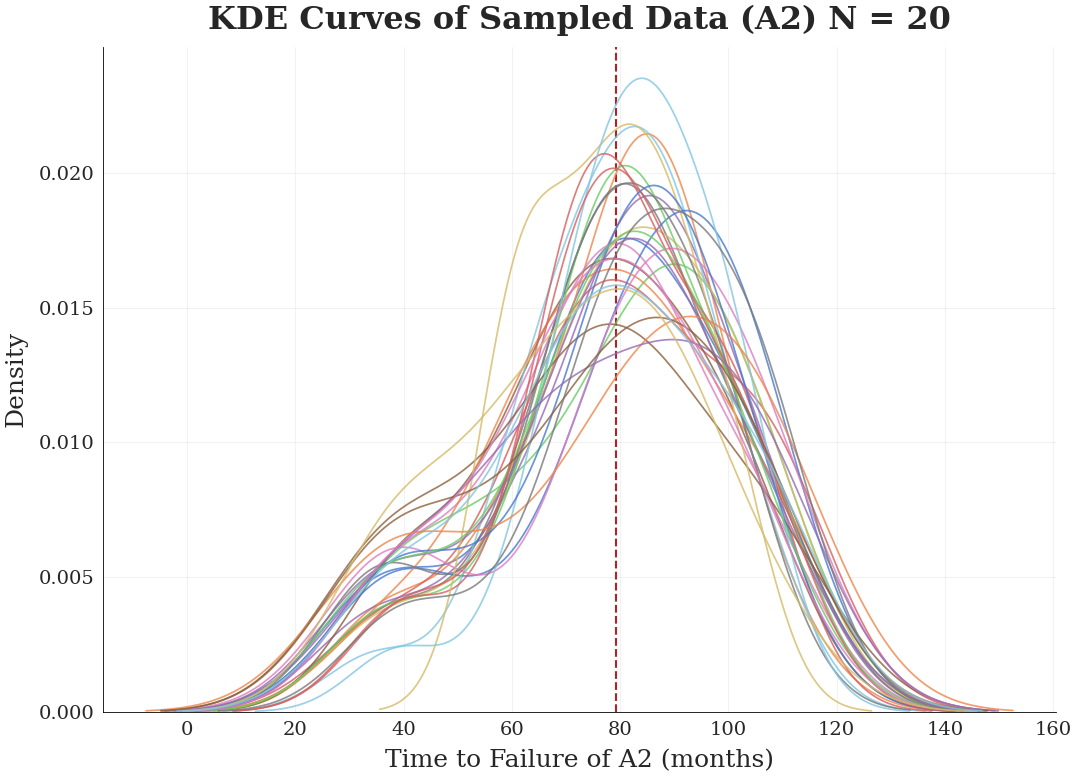

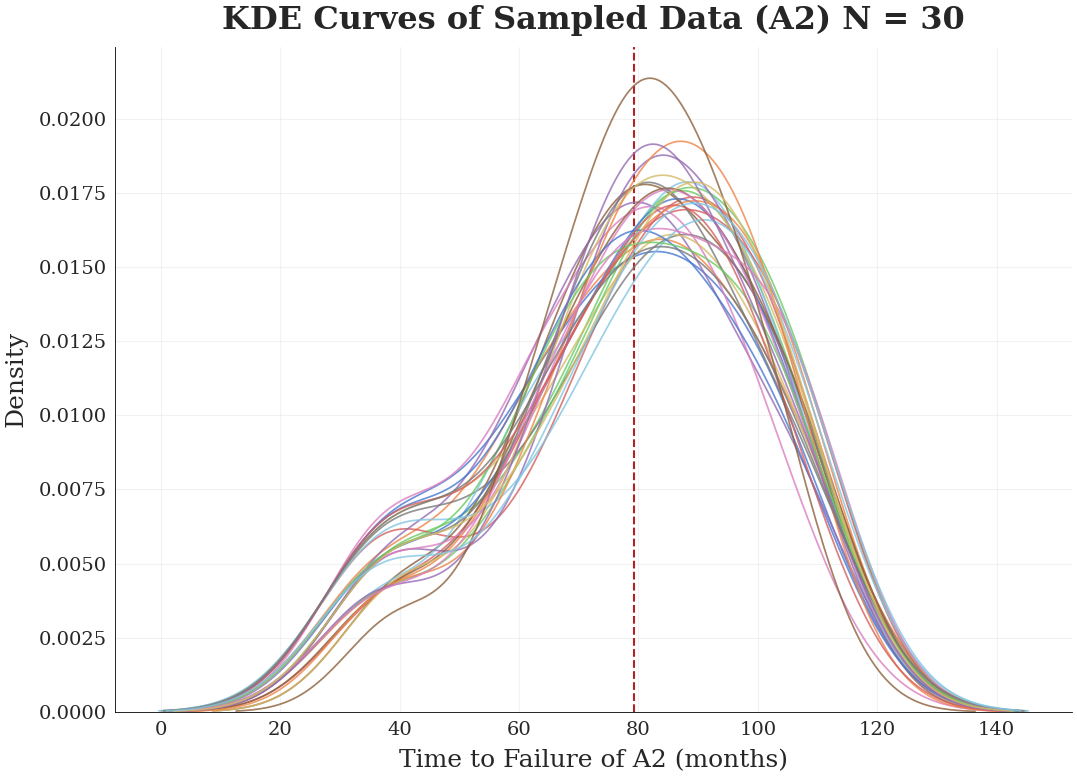

In [26]:
N_array = [15,20,30]
for N in N_array:
    plt.figure(figsize=(22, 16), dpi=50)
    sns.set_theme(style="whitegrid")
    sns.set_context("talk")  
    plt.rcParams.update({
        'font.family': 'serif',
        'font.size': 22,
        'axes.titlesize': 40,
        'axes.labelsize': 32,
        'xtick.labelsize': 28,
        'ytick.labelsize': 28,
        'legend.fontsize': 24,
        'axes.edgecolor': 'black',
        'axes.linewidth': 1.2,
        'grid.alpha': 0.25,      
        'lines.linewidth': 3.0,
    })


    plt.axvline(x=6.6 * 12, linestyle="--", color='firebrick', linewidth=3, label="Threshold")
    palette = sns.color_palette("muted", 30)

    for i in range(1, 31):
        df_test = pd.read_csv(f'../bootstrapping_data/sample_{N}/sampled_data_{i}.csv')
        sns.kdeplot(data=df_test, x="TTF of A2", linewidth=2.5, color=palette[i-1], alpha=0.8)


    plt.title(f"KDE Curves of Sampled Data (A2) N = {N}", fontsize=46, fontweight='bold', pad=25)
    plt.xlabel("Time to Failure of A2 (months)", fontsize=36, labelpad=15)
    plt.ylabel("Density", fontsize=36, labelpad=15)
    sns.despine() 
    plt.tight_layout()
    # plt.savefig(f'dataset/Fig/kde_sample_A2_{N}.png')
    plt.show()

## studentized_bootstrap_ci

In [80]:
def bootstrap_se(data, estimator, B):
    n = len(data)
    thetas = np.empty(B)
    for i in range(B):
        sample = np.random.choice(data, size=n, replace=True)
        thetas[i] = estimator(sample)

    return np.std(thetas, ddof=1)
def studentized_bootstrap_ci(data,theta,n,B,alpha,Area):
    theta_b_array = []
    t_b_array = []
    for b in range(B):
        sample = np.random.choice(data, size=n, replace=True)
        theta_b = np.mean(sample) #Obtain bootstrap replicate 

        theta_b_array.append(theta_b)
        se_b = bootstrap_se(sample, np.mean, B=200) # Estimate standard error b by bootstrapping the current bootstrap sample
        t_b = (theta_b - theta) / se_b # Calculate bootstrap t statistic
        t_b_array.append(t_b)

    se_theta = np.std(theta_b_array, ddof=1) # Calculate standard error hat based on the bootstrap replicates

    t_low = np.quantile(t_b_array, alpha / 2)
    t_high = np.quantile(t_b_array, 1 - alpha / 2)

    ci_lower = theta - t_high * se_theta
    ci_upper = theta - t_low * se_theta
    print(f"Bootstrap t Confidence Interval for Mean TTF of {Area} with n={n}: ({ci_lower:.4f}, {ci_upper:.4f})")
    return ci_lower, ci_upper

sample_15_A1 = studentized_bootstrap_ci(df['TTF of A1'].values, 6.6 * 12, 15, 40, 0.05,"A1")
sample_15_A2 = studentized_bootstrap_ci(df['TTF of A2'].values, 6.6 * 12, 15, 40, 0.05,"A2")

sample_20_A1 = studentized_bootstrap_ci(df['TTF of A1'].values, 6.6 * 12, 20, 40, 0.05,"A1")
sample_20_A2 = studentized_bootstrap_ci(df['TTF of A2'].values, 6.6 * 12, 20, 40, 0.05,"A2")

sample_30_A1 = studentized_bootstrap_ci(df['TTF of A1'].values, 6.6 * 12, 30, 40, 0.05,"A1")
sample_30_A2 = studentized_bootstrap_ci(df['TTF of A2'].values, 6.6 * 12, 30, 40, 0.05,"A2")

Bootstrap t Confidence Interval for Mean TTF of A1 with n=15: (66.7002, 85.0207)
Bootstrap t Confidence Interval for Mean TTF of A2 with n=15: (70.7164, 82.9005)
Bootstrap t Confidence Interval for Mean TTF of A1 with n=20: (70.7410, 82.9255)
Bootstrap t Confidence Interval for Mean TTF of A2 with n=20: (67.0791, 85.3895)
Bootstrap t Confidence Interval for Mean TTF of A1 with n=30: (68.0224, 84.7273)
Bootstrap t Confidence Interval for Mean TTF of A2 with n=30: (70.3658, 80.6322)


(64.2133012748351, 84.43998315653633)